<a href="https://colab.research.google.com/github/ClovisMonteiro/CCIA/blob/main/CCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESSO SELETIVO CCIA – HACKATON

## Projeto prático para demonstrar conhecimentos na área de Ciência de Dados utilizando a linguagem de programação Python

##### Por Clovis Monteiro da Silva Filho

Objetivo: Realizar a criação de um modelo de previsão da velocidade do vento a 50 metros de altura para 3h à frente a partir de dados de torres anemométricas da plataforma SONDA – Estação de Petrolina.

# ETAPA 1 

In [ ]:
# importando bibliotecas necessárias para o tratamento dos dados

import pandas as pd
import os

In [ ]:
os.listdir("./")

['.config', 'teste.csv', 'treino.csv', 'sample_data']

### • Lendo os arquivos de dados

In [ ]:
# Abrindo o arquivo de treino
treino = pd.read_csv("treino.csv", sep=',', encoding='utf-8')

In [ ]:
# Verificando o tipo de cada coluna
treino.dtypes

ano                       int64
dia                       int64
data-hora                object
minuto                    int64
velocidde-vento-25m     float64
direcao-vento-25m       float64
temperatura-25m         float64
velocidade-vento-50m    float64
direcao-vento-50m       float64
temratura-50m           float64
dtype: object

In [ ]:
teste = pd.read_csv("teste.csv", sep=',', encoding='utf-8')

In [ ]:
teste.dtypes

ano                       int64
dia                       int64
data-hora                object
minuto                    int64
velocidde-vento-25m     float64
direcao-vento-25m       float64
temperatura-25m         float64
velocidade-vento-50m    float64
direcao-vento-50m       float64
temratura-50m           float64
dtype: object

### • Alterando o nome das colunas colunas “temratura-50m” e “velocidde-vento-25m” para “temperatura-50m” e “velocidade-vento-25m”

In [ ]:
treino.rename(columns={'temratura-50m': 'temperatura-50m', 'velocidde-vento-25m':'velocidade-vento-25m'}, inplace=True)

In [ ]:
teste.rename(columns={'temratura-50m': 'temperatura-50m', 'velocidde-vento-25m':'velocidade-vento-25m'}, inplace=True)

### •	Exiba os 5 primeiros elementos do dataset de treino e de teste

In [ ]:
treino.head(5)

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m,mes
0,2010,1 00:00:00,2010-1-1 00:00:00,0,0.881500,298.333333,24.868333,0.932500,318.233333,24.888333,1
1,2010,1 01:00:00,2010-1-1 01:00:00,60,1.366167,329.533333,24.826667,1.825333,321.100000,24.858333,1
2,2010,1 02:00:00,2010-1-1 02:00:00,120,1.118667,290.233333,24.648333,2.170333,276.033333,25.133333,1
3,2010,1 03:00:00,2010-1-1 03:00:00,180,0.618000,196.950000,23.916667,1.472500,218.800000,24.268333,1
4,2010,1 04:00:00,2010-1-1 04:00:00,240,1.517833,117.183333,23.740000,2.058333,130.333333,23.801667,1


In [ ]:
teste.head(5)

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,278,2010-10-5 08:00:00,480,3.257333,139.116667,21.621667,4.960833,133.550000,21.283333
1,2010,278,2010-10-5 09:00:00,540,2.786167,143.883333,22.186667,3.783000,138.800000,21.550000
2,2010,278,2010-10-5 10:00:00,600,5.204167,144.983333,23.358333,6.489667,140.066667,22.695000
3,2010,278,2010-10-5 11:00:00,660,5.404333,133.116667,25.068333,6.390000,128.200000,24.313333
4,2010,278,2010-10-5 12:00:00,720,5.333167,139.266667,26.551667,6.098167,134.283333,25.748333


### • Exibindo a quantidade total de elementos nas tabelas e a média dos valores da coluna velocidade-vento-50m

In [ ]:
#Quantidade total de elementos nas tabelas

print("O arquivo de treino possui:"+ str(treino.shape[0]) + " linhas e " + str(treino.shape[1]) + " colunas. ")
print("O arquivo de teste possui:"+ str(teste.shape[0]) + " linhas e " + str(teste.shape[1]) + " colunas. ")

O arquivo de treino possui:6656 linhas e 11 colunas. 
O arquivo de teste possui:1000 linhas e 10 colunas. 


In [ ]:
# Média dos valores da coluna  "velocidade-vento-50m"

print("Dataset de treino possui a coluna 'velocidade-vento-50m' com média : %.2f" % treino['velocidade-vento-50m'].mean() +".")

Dataset de treino possui a coluna 'velocidade-vento-50m' com média : 5.02.


In [ ]:
print("Dataset de teste possui a coluna 'velocidade-vento-50m' com média : %.2f" % teste['velocidade-vento-50m'].mean() +".")

Dataset de teste possui a coluna 'velocidade-vento-50m' com média : 5.02.


In [ ]:
# Exibindo médias completas e separadas
teste['velocidade-vento-50m'].mean()

5.022554333333336

In [ ]:
treino['velocidade-vento-50m'].mean()

5.016940604967936

## •	Exiba qual Data apresentou o maior valor de velocidade-vento-50m;

A melhor lógica pensada para esse caso foi ordenar a tabela do maior para o melhor e consultar o maior valor existente na coluna, em seguida pegar o dado na coluna de hora

In [ ]:
# verificando qual é o maior valor existente no dataset de treino
treino['velocidade-vento-50m'].sort_values(ascending=False)

6085    10.521667
1178    10.276667
1177    10.056667
6359    10.020000
1198     9.990833
          ...    
2096     0.364667
947      0.358500
3201     0.339667
20       0.334500
48       0.097167
Name: velocidade-vento-50m, Length: 6656, dtype: float64

In [ ]:
# mostrando as informações do maior valor
treino.loc[6085:6085]

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m,mes
6085,2010,11 13:00:00,2010-9-11 13:00:00,780,8.553333,160.916667,22.681667,10.521667,156.2,21.91,9


In [ ]:
treino.iloc[6085]['data-hora']

'2010-9-11 13:00:00'

In [ ]:
print(" A data que apresentou maior valor de velocidade foi: " + treino.iloc[6085]['data-hora'][0:10]+".")

 A data que apresentou maior valor de velocidade foi: 2010-9-11 .


In [ ]:
# verificando qual é o maior valor existente no dataset de teste

teste['velocidade-vento-50m'].sort_values(ascending=False)

517    9.985000
209    9.765000
844    9.586667
833    9.483333
233    9.456667
         ...   
529    0.703833
972    0.701167
571    0.588167
365    0.577000
526    0.269833
Name: velocidade-vento-50m, Length: 1000, dtype: float64

In [ ]:
treino.loc[517:517]

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m,mes
517,2010,22 13:00:00,2010-1-22 13:00:00,780,4.910333,98.9,27.07,5.557,94.316667,26.295,1


In [ ]:
teste.iloc[517]['data-hora']

'2010-10-26 21:00:00'

In [ ]:
print(" A data que apresentou maior valor de velocidade foi: " + teste.iloc[517]['data-hora'][0:10]+".")

 A data que apresentou maior valor de velocidade foi: 2010-10-26.


## Análise exploratória dos dados 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Identificando possíveis análises a partir de avaliação estatística
treino.describe()

,ano,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
count,6656.0,6656.000000,6656.000000,6656.000000,6655.000000,6656.000000,6655.000000,6656.000000
mean,2010.0,689.423077,3.780990,145.418534,26.080820,5.016941,139.766473,25.645969
std,0.0,415.473115,1.377644,34.336953,3.757746,1.619845,34.142498,3.713573
min,2010.0,0.000000,-0.007833,6.557000,16.061667,0.097167,12.635333,16.185000
25%,2010.0,300.000000,2.801167,129.045833,23.250000,3.950958,124.326667,22.845000
50%,2010.0,660.000000,3.656417,143.908333,25.728333,5.022417,138.533333,25.295833
75%,2010.0,1020.000000,4.745625,158.487500,28.778333,6.082958,152.025000,28.353333
max,2010.0,1380.000000,8.553333,351.066667,36.400000,10.521667,346.850000,35.753333


In [ ]:
teste.describe()

,ano,dia,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.0,298.664000,693.840000,3.894355,134.224431,27.993528,5.022554,129.178476,27.571610
std,0.0,12.035279,414.780541,1.321615,44.395029,3.814328,1.592096,44.847802,3.802059
min,2010.0,278.000000,0.000000,0.522333,17.988000,20.275000,0.269833,11.077000,19.950000
25%,2010.0,288.000000,360.000000,3.042042,109.887500,24.571667,4.104208,105.408333,24.185833
50%,2010.0,299.000000,720.000000,3.868333,128.250000,27.837500,5.079333,123.658333,27.325833
75%,2010.0,309.000000,1080.000000,4.702917,142.620833,31.203333,5.960708,137.091667,30.968750
max,2010.0,319.000000,1380.000000,8.301667,339.750000,36.205000,9.985000,337.083333,35.411667


In [ ]:
treino.head()

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m,mes
0,2010,1 00:00:00,2010-1-1 00:00:00,0,0.881500,298.333333,24.868333,0.932500,318.233333,24.888333,1
1,2010,1 01:00:00,2010-1-1 01:00:00,60,1.366167,329.533333,24.826667,1.825333,321.100000,24.858333,1
2,2010,1 02:00:00,2010-1-1 02:00:00,120,1.118667,290.233333,24.648333,2.170333,276.033333,25.133333,1
3,2010,1 03:00:00,2010-1-1 03:00:00,180,0.618000,196.950000,23.916667,1.472500,218.800000,24.268333,1
4,2010,1 04:00:00,2010-1-1 04:00:00,240,1.517833,117.183333,23.740000,2.058333,130.333333,23.801667,1


In [ ]:
mes = treino['data-hora'].str.split("-", expand=True)[1]
treino['mes'] = mes
df_agp = treino.groupby('mes').mean()
df_agp.reset_index(inplace=True)

In [ ]:
df_agp.mes = df_agp.mes.astype('int')

In [ ]:
df_agp.dtypes

mes                       int64
ano                     float64
minuto                  float64
velocidade-vento-25m    float64
direcao-vento-25m       float64
temperatura-25m         float64
velocidade-vento-50m    float64
direcao-vento-50m       float64
temperatura-50m         float64
dtype: object

In [ ]:
df_agp.round(2)

df_agp = df_agp.sort_values('mes', ascending='True')

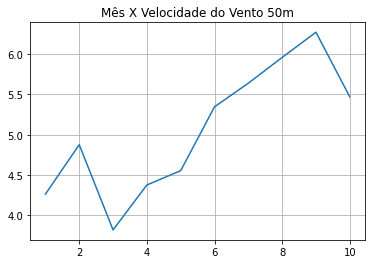

In [ ]:
plt.plot(df_agp['mes'], df_agp['velocidade-vento-50m'])
plt.title("Mês X Velocidade do Vento 50m")
plt.grid(True)
plt.show()

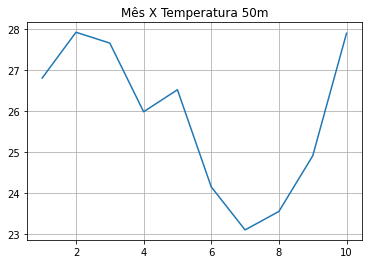

In [ ]:
plt.plot(df_agp['mes'], df_agp['temperatura-50m'])
plt.title("Mês X Temperatura 50m")
plt.grid(True)
plt.show()


Com a análise anterior, é possível identificar uma forte relação da valocidade do vento com a temperatura. As duas dimensões na tabela são teoricamente inversamente proporcionais. 

- Quanto maior a temperatura, menor a velocidade do vento.
- Quanto menor a temperatura, maior a velocidade do vento.

obs.: Trabalhei apenas com valores médios para as análises por mês

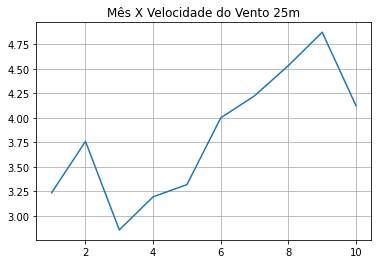

In [ ]:
plt.plot(df_agp['mes'], df_agp['velocidade-vento-25m'])
plt.title("Mês X Velocidade do Vento 25m")
plt.grid(True)
plt.show()

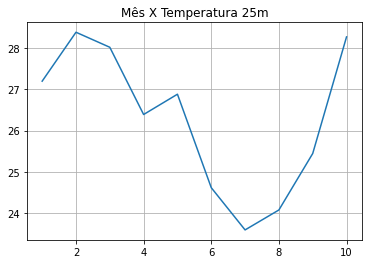

In [ ]:
plt.plot(df_agp['mes'], df_agp['temperatura-25m'])
plt.title("Mês X Temperatura 25m")
plt.grid(True)
plt.show()

Acabei não me alongando muito por conta das duas etapas seguintes. Mas tem muita coisa que pode ser analisada ainda

# Etapa 2